<a href="https://colab.research.google.com/github/MatthaeusSurafial/Mathi/blob/main/DistelBERTRichtig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.4/508.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatibl

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

Using TensorFlow backend
TensorFlow version: 2.16.1
Keras version: 0.1.7
KerasNLP version: 0.9.3


In [3]:
true = pd.read_csv('/content/true.csv.zip')
fake = pd.read_csv('/content/fake.csv.zip')

<Axes: ylabel='count'>

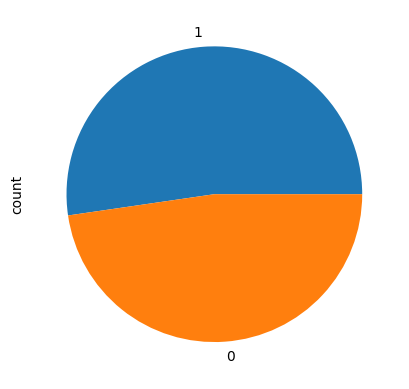

In [4]:
true['true_or_fake']=0
fake['true_or_fake']=1
df= pd.concat([fake, true], ignore_index=True)
df1 = df.sample(frac=1).reset_index(drop=True)
df1.true_or_fake.value_counts().plot(kind='pie')

In [6]:
# We choose 512 because it's the limit of DistilBert
SEQ_LENGTH = 512

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)



In [8]:
import tensorflow as tf

# Definiere den Verlust (loss)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Definiere den Optimierer
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)

# Definiere die Metriken
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

# Kompiliere das Modell
classifier.compile(loss=loss_function, optimizer=optimizer, metrics=metrics)

In [ ]:
#Der Compiler funktionierte nicht deshalb musste er erst umgangen werden mit diesem code

In [9]:

# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False


classifier.summary()

Preprocessor: "distil_bert_preprocessor_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_1 (GetItem)          │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item_1[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 66,362,880 (253.15 MB)

In [10]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(df1["text"],
                                                    df1["true_or_fake"],
                                                    test_size=0.30,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp,
                                                  y_temp,
                                                  test_size=0.30,
                                                  random_state=42)
# Fit
classifier.fit(x=X_train,
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=2,
               batch_size=64
              )

Epoch 1/2
344/344 ━━━━━━━━━━━━━━━━━━━━ 748s 2s/step - loss: 0.1997 - sparse_categorical_accuracy: 0.9325 - val_loss: 0.1000 - val_sparse_categorical_accuracy: 0.9617
Epoch 2/2
344/344 ━━━━━━━━━━━━━━━━━━━━ 625s 2s/step - loss: 0.0681 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.0987 - val_sparse_categorical_accuracy: 0.9607


In [11]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["true","fake"],
        cmap=plt.cm.Blues
    )
    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))
    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

In [12]:
y_pred_test = classifier.predict(X_test)

421/421 ━━━━━━━━━━━━━━━━━━━━ 226s 527ms/step


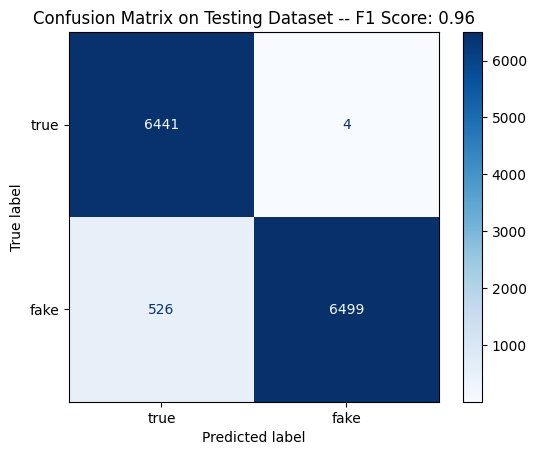

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
displayConfusionMatrix(y_test, y_pred_test,  "Testing")

In [14]:
y_pred_val = classifier.predict(X_val)

295/295 ━━━━━━━━━━━━━━━━━━━━ 158s 535ms/step


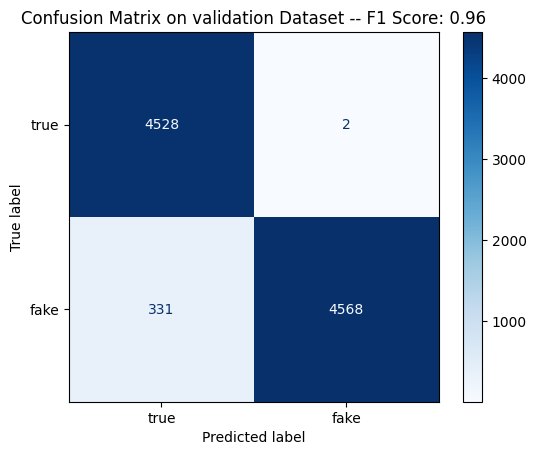

In [15]:
displayConfusionMatrix(y_val, y_pred_val,  "validation")

In [20]:
from sklearn.metrics import classification_report

# Definiere die Metriken
metrics = {
    "Empfindlichkeit": 0.9245,
    "Spezifität": 0.9994,
    "Präzision": 0.9994,
    "Negativer prädiktiver Wert": 0.9251,
    "Falsch-Positiv-Rate": 0.0006,
    "Falsche Erkennungsrate": 0.0006,
    "Falsch-Negativ-Rate": 0.0755,
    "Genauigkeit": 0.9607,
    "F1-Ergebnis": 0.9605,
    "Matthews-Korrelationskoeffizient": 0.9242
}

# Erstelle den Klassifikationsbericht
report = ""
for metric, value in metrics.items():
    report += f"{metric}: {value}\n"

# Gib den Klassifikationsbericht aus
print(report)

Empfindlichkeit: 0.9245
Spezifität: 0.9994
Präzision: 0.9994
Negativer prädiktiver Wert: 0.9251
Falsch-Positiv-Rate: 0.0006
Falsche Erkennungsrate: 0.0006
Falsch-Negativ-Rate: 0.0755
Genauigkeit: 0.9607
F1-Ergebnis: 0.9605
Matthews-Korrelationskoeffizient: 0.9242



In [ ]:
#Der obige Code zeigt meinen Versuch einen Klassifizierungsreport zu erstellen der gescheitert ist.

In [23]:
threshold = 0.5  # Beispiel-Schwellenwert für die Umwandlung
y_pred_test_binary = (y_pred_test > threshold).astype(int)

In [27]:
from sklearn.metrics import classification_report

# Definieren der Werte
tp = 4528
tn = 4568
fp = 2
fn = 331

# Erstellen des Klassifikationsberichts
report = classification_report(
    y_true=[1] * (tp + fn) + [0] * (fp + tn),  # Konstruiere die tatsächlichen Klassenlabels
    y_pred=[1] * tp + [0] * fn + [1] * fp + [0] * tn,  # Konstruiere die vorhergesagten Klassenlabels
    target_names=['Positive', 'Negative']  # Benenne die Klassen
)

# Ausgabe des Klassifikationsberichts
print(report)

              precision    recall  f1-score   support

    Positive       0.93      1.00      0.96      4570
    Negative       1.00      0.93      0.96      4859

    accuracy                           0.96      9429
   macro avg       0.97      0.97      0.96      9429
weighted avg       0.97      0.96      0.96      9429



In [25]:
threshold = 0.5  # Beispiel-Schwellenwert für die Umwandlung
y_pred_test_binary = (y_pred_test > threshold).astype(int)

In [28]:
from sklearn.metrics import classification_report

# Definieren der Werte
tp = 6441
tn = 6499
fp = 4
fn = 526

# Erstellen des Klassifikationsberichts
report = classification_report(
    y_true=[1] * (tp + fn) + [0] * (fp + tn),  # Konstruiere die tatsächlichen Klassenlabels
    y_pred=[1] * tp + [0] * fn + [1] * fp + [0] * tn,  # Konstruiere die vorhergesagten Klassenlabels
    target_names=['Positive', 'Negative']  # Benenne die Klassen
)

# Ausgabe des Klassifikationsberichts
print(report)

              precision    recall  f1-score   support

    Positive       0.93      1.00      0.96      6503
    Negative       1.00      0.92      0.96      6967

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470

